In [ ]:
#matplotlib.pyplot is a package designed to do visual data analytics in 2D, built on top of numpy. Originally conceived for scientific computation, not presentation
#seaborn is a more modern "add-on", with extensive pandas integration and a somewhat updated pallete and viduals, but still ugly IMHO 
#https://matplotlib.org/3.2.1/index.html
import matplotlib.pyplot as plt 
import seaborn as sns

import pandas as pd

In [ ]:
superstore = pd.read_excel("/content/Sample - Superstore.xls")

In [ ]:
superstore.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


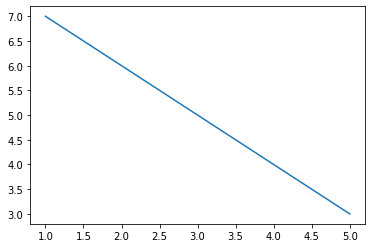

In [ ]:
# Let's look at the basic "plot" 2D primitive

plt.plot([1,2,3,4,5],[7,6,5,4,3])
#plt.plot([1,2,3,4,5],[7,6,5,4,3],'bo')
#plt.plot([1,2,3,4,5],[5,4,3,2,1],'r+')
#https://matplotlib.org/3.3.3/api/markers_api.html
#plt.ylabel("Attention span")
#plt.xlabel("Number of mentions to SQL")
#plt.title('Very Important Chart')

#plt show discharges the accumulated options for plt so far
plt.show()
#plt.savefig('outputfile.png')

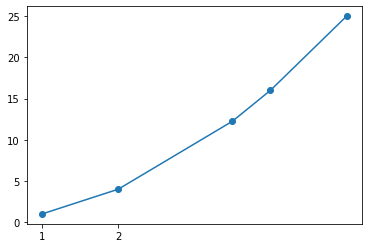

In [ ]:
# axis manipulation
import numpy as np

x = np.array([1,2,3.5,4,5])
y = np.square(x)

my_xticks = ['first','second', 'third', 'forth', 'fifth'] #NTS: reconstruct

#plt.xticks(x, my_xticks)

#display(np.arange(-7, 3, 1)) ## from -7 (inclusive) to 3 (exclusive) with a step of one

plt.xticks(np.arange(-7, 3, 1))
#plt.yticks(np.arange(y.min(), y.max(), 3))

#plt.xlim(-5, 5)
#plt.ylim(-5, 25)

plt.plot(x,y,'o-')
plt.show()

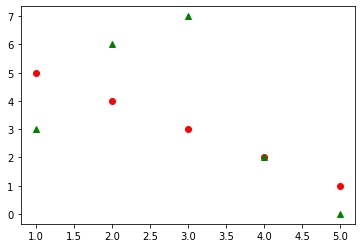

In [ ]:
#multiple series
plt.plot([1,2,3,4,5],[5,4,3,2,1],"ro",[1,2,3,4,5],[3,6,7,2,0],"g^")
#plt.plot([5,4,3,2,1],"ro",[1,2,3,4,5],[3,6,7,2,0],"g^") # if you don't specify the a list with x values it will assume a range from 0 to the max value index

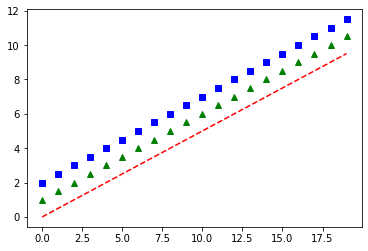

In [ ]:
# you can also create mathematical functions based on an array

y = np.arange(0,10,0.5)
plt.plot(y,'r--',y+1, 'g^',y+2,'bs') 
#not giving it an x forces x to be range(0,len(y))
plt.show()

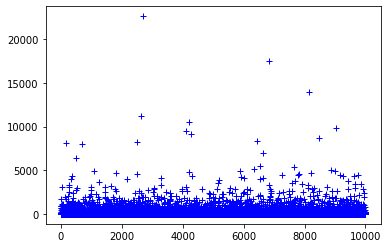

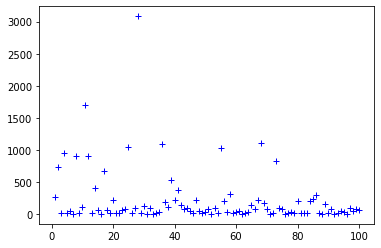

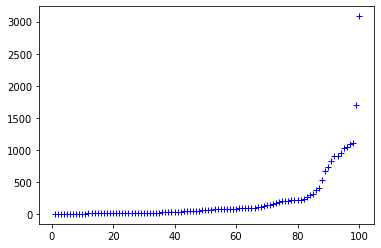

In [ ]:
# and you can use data from dataframes
plt.plot(superstore['Ro
w ID'],superstore['Sales'],'b+')
plt.show()

plt.plot(superstore['Row ID'][:100],superstore['Sales'][:100],'b+')
plt.show()

plt.plot(superstore['Row ID'][:100],superstore['Sales'][:100].sort_values(),'b+')
plt.show()


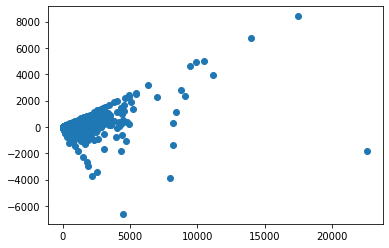

In [ ]:
#options primitives and scatterplots
# c = colour
# s = size
plt.scatter(superstore['Sales'],superstore['Profit'])
#plt.scatter(superstore['Sales'],superstore['Profit'],c = 'green')
#plt.scatter(superstore['Sales'],superstore['Profit'],c = superstore['Quantity'])
#plt.scatter(superstore['Sales'],superstore['Profit'],s = (5*superstore['Quantity'])^9)
plt.show()

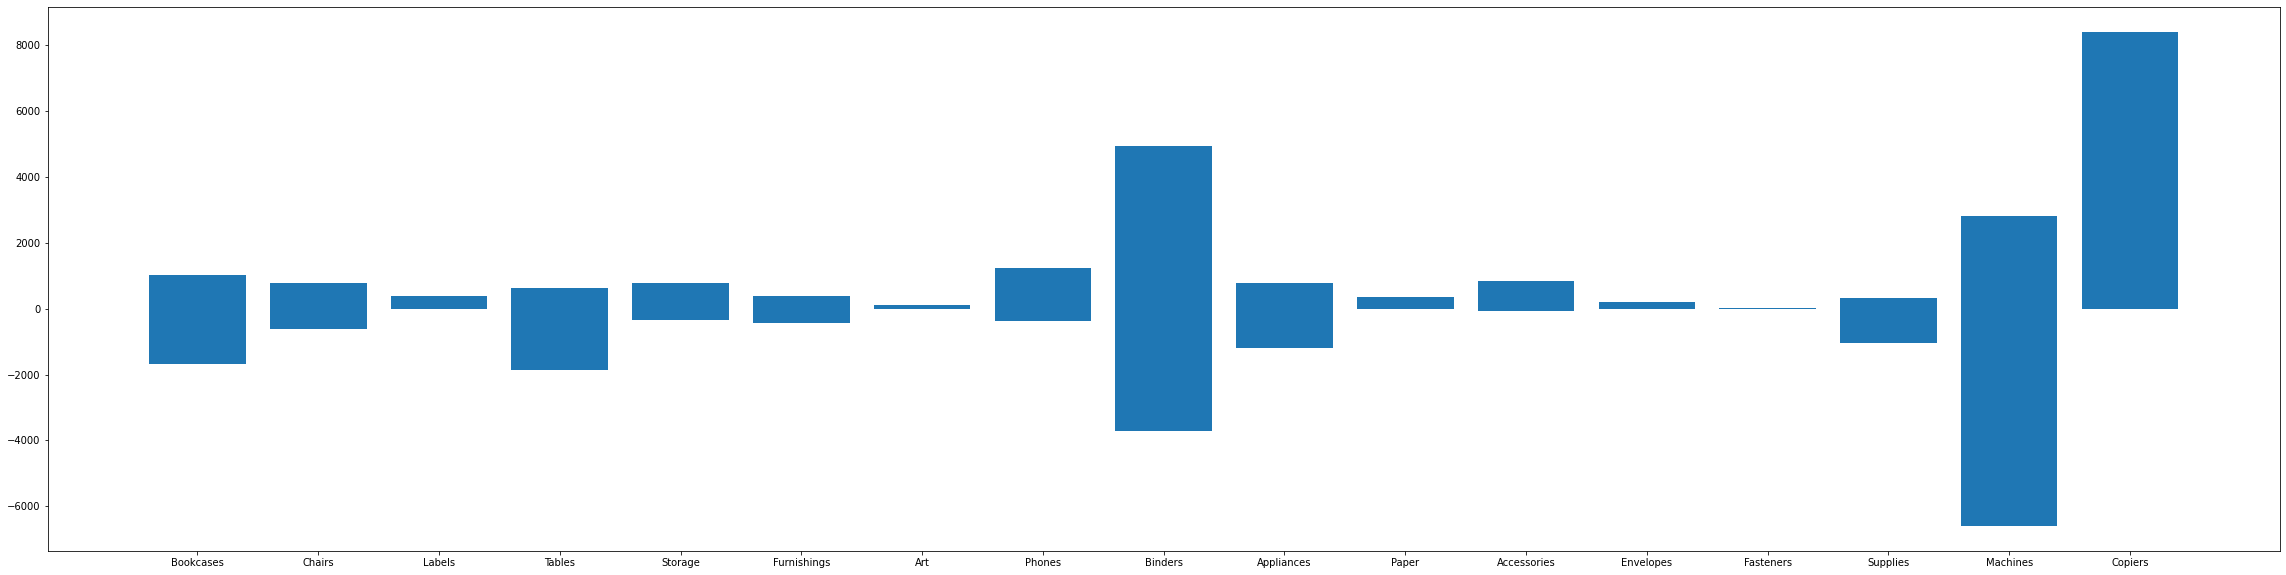

In [ ]:
#bar charts and aggregated measures on dimensions
plt.figure(figsize = (40,10))
plt.bar(superstore['Sub-Category'],superstore['Profit'])
#plt.xticks(fontsize=24,rotation=45)
plt.show()
#Can you figure out what's going on here? Take a look ath the "0" line
#And how to correct it?

In [ ]:
# to get the bar chart, we need to make sure that the content is aggregated to the right level
category_profit = superstore.groupby('Sub-Category').agg({'Profit':'sum'}).reset_index()

In [ ]:
category_profit

,Sub-Category,Profit
0,Accessories,41936.6357
1,Appliances,18138.0054
2,Art,6527.7870
3,Binders,30221.7633
4,Bookcases,-3472.5560
5,Chairs,26590.1663
6,Copiers,55617.8249
7,Envelopes,6964.1767
8,Fasteners,949.5182
9,Furnishings,13059.1436


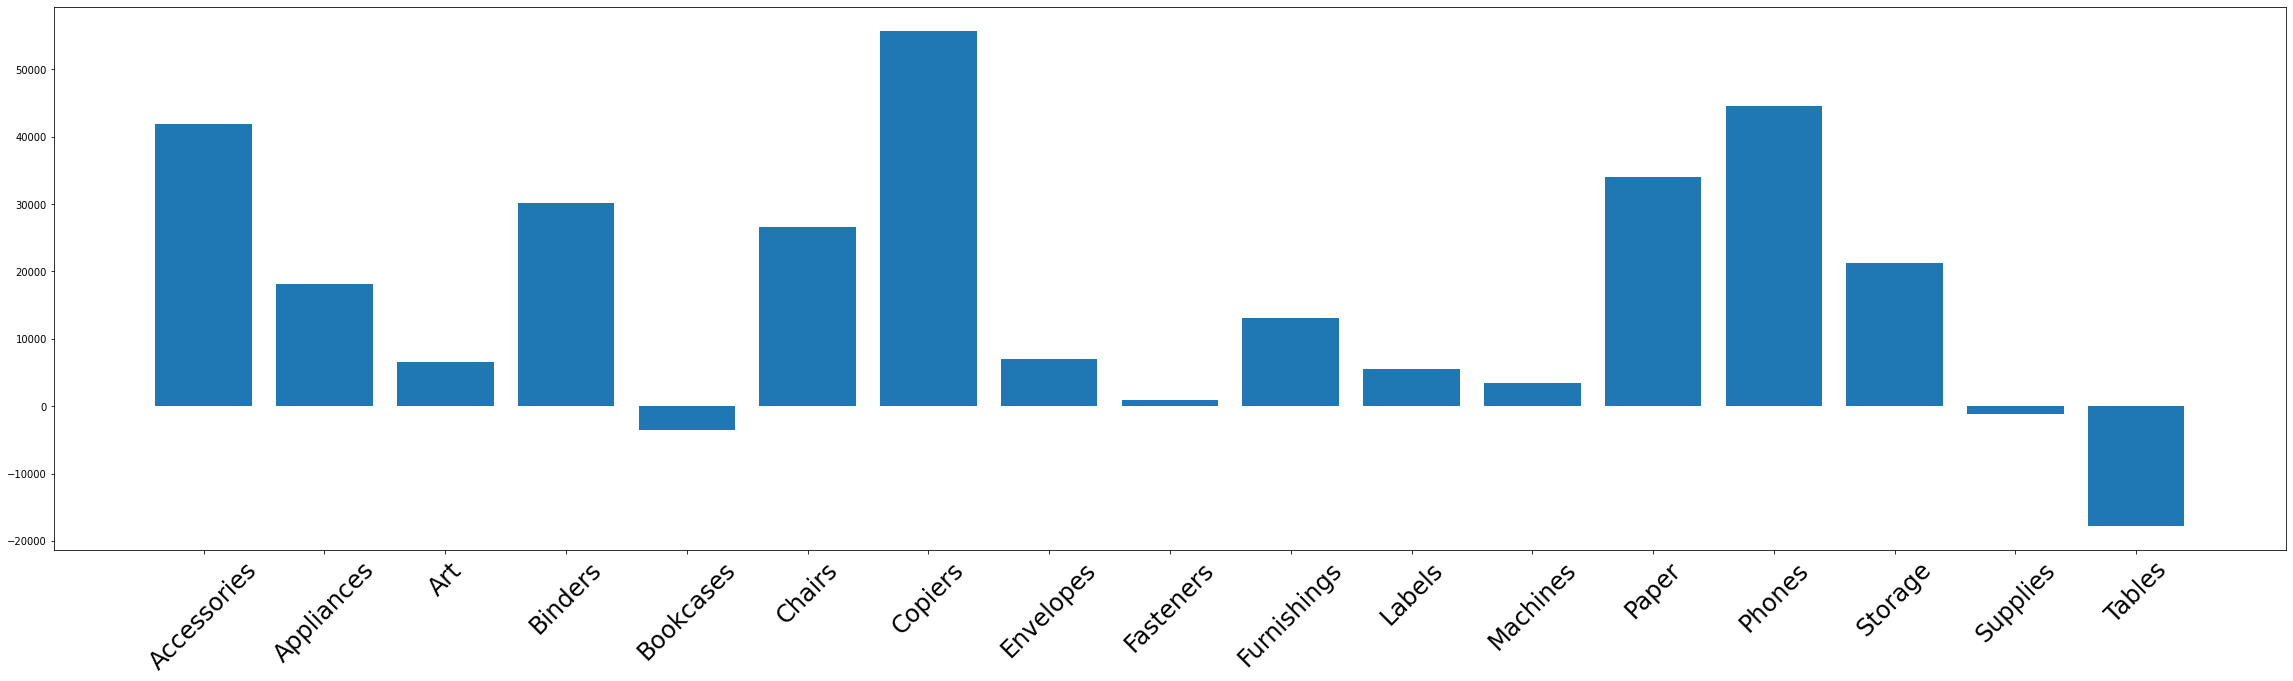

In [ ]:
plt.figure(figsize = (40,10))
plt.bar(category_profit['Sub-Category'],category_profit['Profit'])
plt.xticks(fontsize=24,rotation=45)
plt.show()

(<Figure size 432x288 with 6 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87fc9d5550>,
       dtype=object))

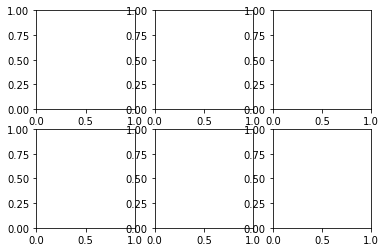

In [ ]:
#subplots - structure
plt.subplots(nrows = 2, ncols = 3)
#notice the return structure: a pair (figure config,2*3 array of "subplots")

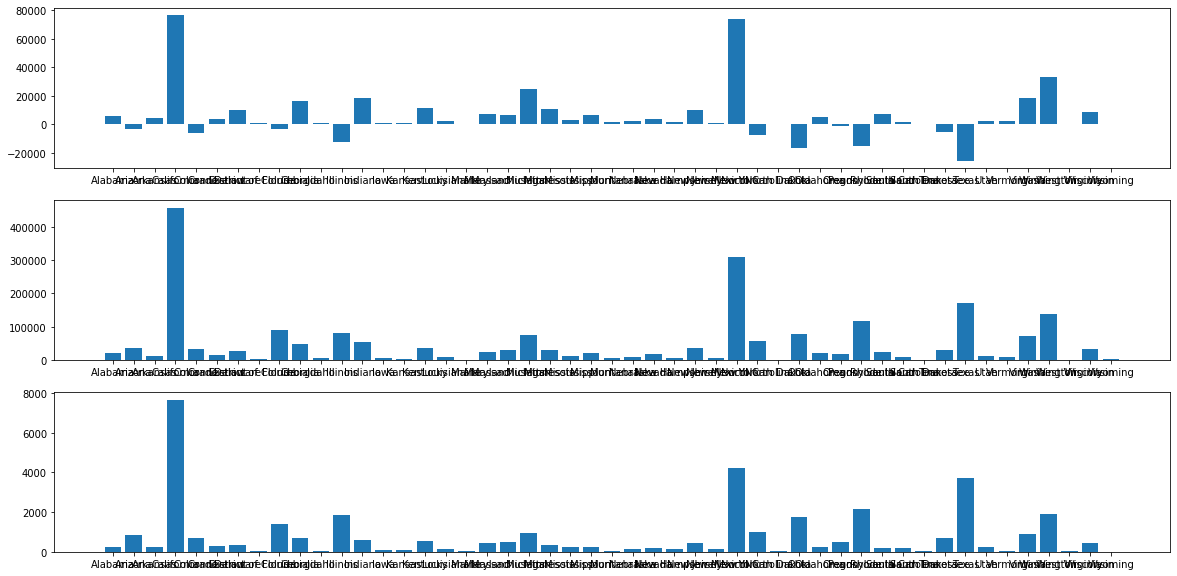

In [ ]:
# subplots - materialized

plot_options , (chart_1,chart_2,chart_3) = plt.subplots(nrows = 3, ncols = 1, figsize = (20,10))

states_total_profit = superstore.groupby('State').agg({'Profit':'sum'}).reset_index()
states_total_sales = superstore.groupby('State').agg({'Sales':'sum'}).reset_index()
states_total_quantity = superstore.groupby('State').agg({'Quantity':'sum'}).reset_index()

chart_1.bar(states_total_profit['State'], states_total_profit['Profit'])
chart_2.bar(states_total_sales['State'], states_total_sales['Sales'])
chart_3.bar(states_total_quantity['State'], states_total_quantity['Quantity'])

plt.show()

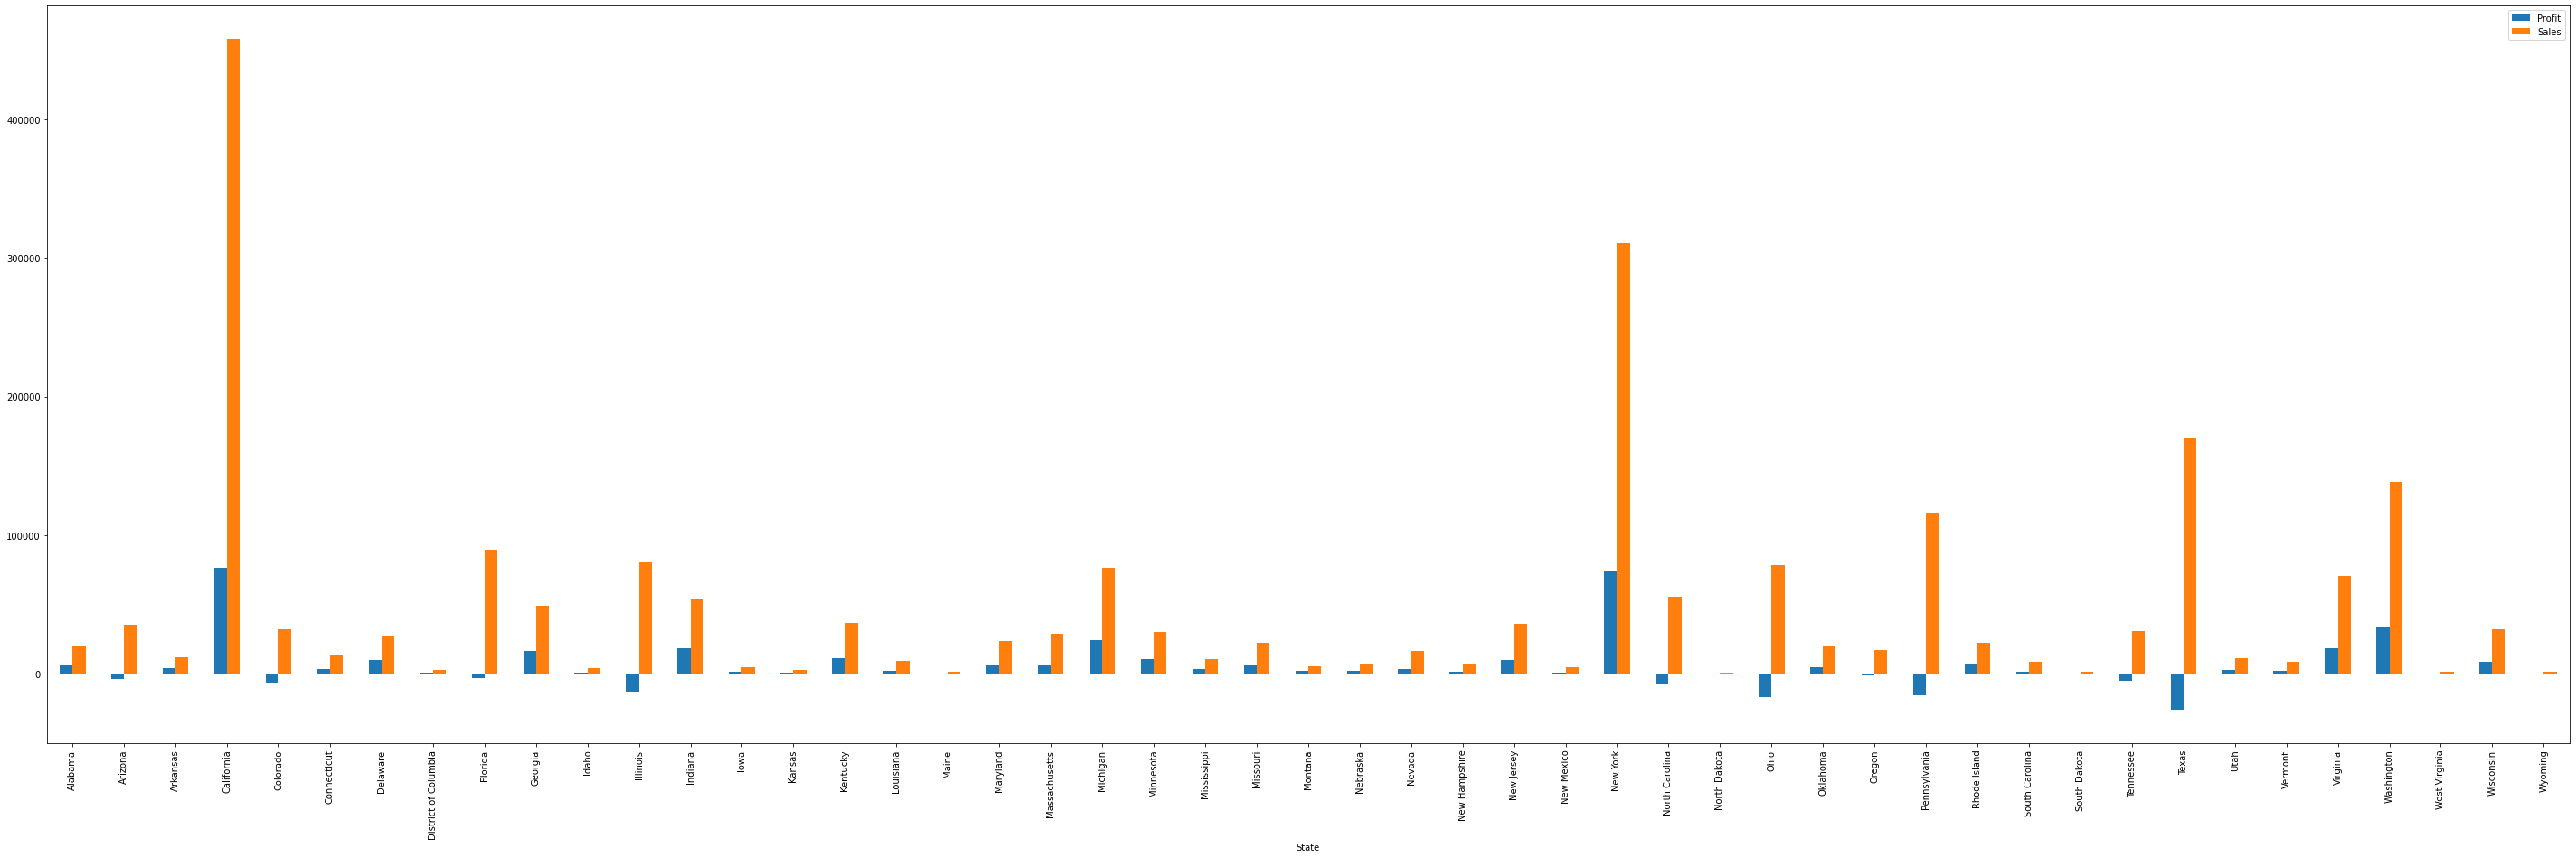

In [ ]:
#because somebody is bound to ask -> time to plot directly from pandas

states_profit_sales = superstore.groupby('State').agg({'Profit':'sum','Sales':'sum'})

#states_profit_sales

states_profit_sales.plot(kind = 'bar', figsize = (50,15))

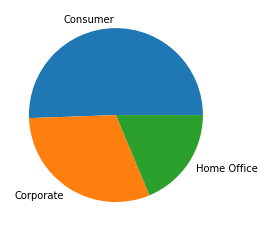

In [ ]:
# number 1 rule of pie charts: DONT USE PIE CHARTS

segment_sales = superstore.groupby('Segment').agg({'Sales':'sum'}).reset_index()
plt.pie(segment_sales['Sales'], labels=segment_sales['Segment'])
plt.show()

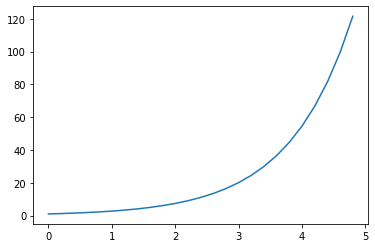

In [ ]:
#logarithmic scale axes: DON'T USE LOGARITHMIC SCALES. 
#you are not talking to researchers and no one in the business "gets" them
#if your measure changes so much that you need a log scale you should be binning your variables in "inconsequential" and "huge"
x = np.arange(0,5,0.2)

plt.plot(x,np.exp(x))
#plt.yscale('log')

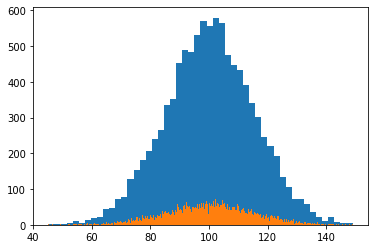

In [ ]:
#histograms
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
plt.hist(x, 50)
#plt.hist(x, 500)
#plt.hist(x, [0,40,80,100,120,140,160])
plt.show()



#Seaborn

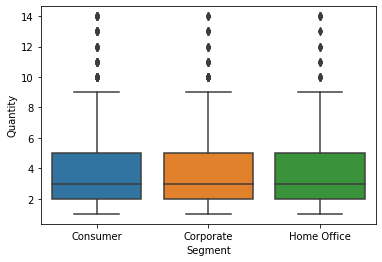

In [ ]:
# https://seaborn.pydata.org/introduction.html

# Boxplots --> used for descriptive statistics (quantils (25%, 50%, 75%) and outliers)
# notetoself: spend some time here, need to explain boxplots
import seaborn as sns
sns.boxplot(x = 'Segment', y = 'Quantity', data = superstore)

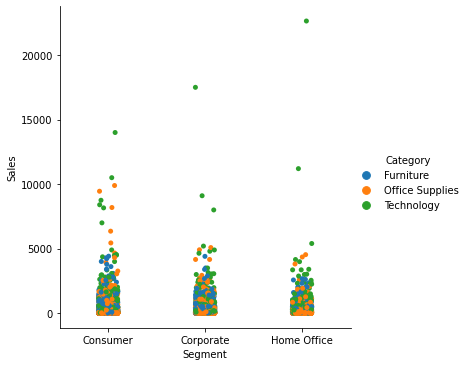

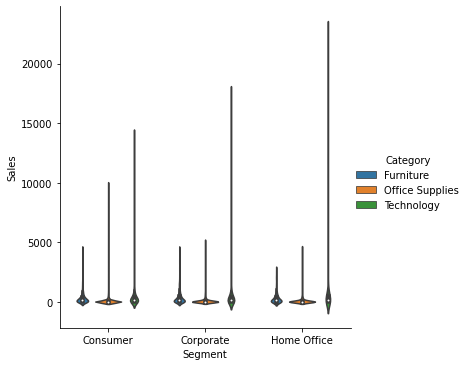

In [ ]:
#catplots

sns.catplot(x = 'Segment', y = 'Sales',hue = 'Category', data = superstore)
sns.catplot(x = 'Segment', y = 'Sales',hue = 'Category', data = superstore, kind = 'violin')

In [ ]:
#correlation matrices - very useful in data science and EDA

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
only_numerics = superstore.select_dtypes(include=numerics)
only_numerics

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
0,1,42420,261.9600,2,0.00,41.9136
1,2,42420,731.9400,3,0.00,219.5820
2,3,90036,14.6200,2,0.00,6.8714
3,4,33311,957.5775,5,0.45,-383.0310
4,5,33311,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...
9989,9990,33180,25.2480,3,0.20,4.1028
9990,9991,92627,91.9600,2,0.00,15.6332
9991,9992,92627,258.5760,2,0.20,19.3932
9992,9993,92627,29.6000,4,0.00,13.3200


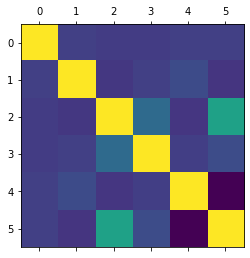

In [ ]:
only_numerics.corr()
plt.matshow(only_numerics.corr())
plt.show()

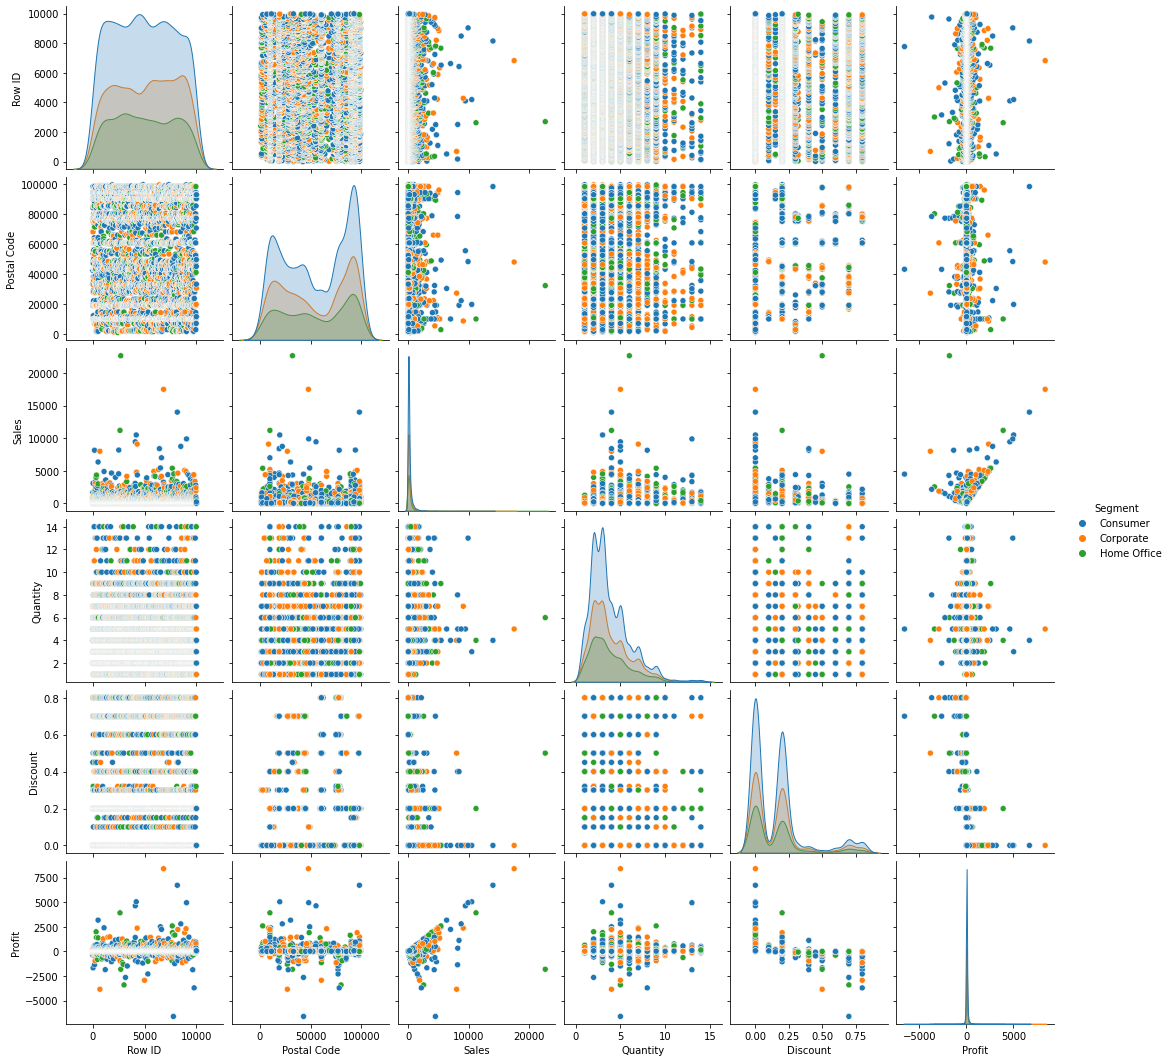

In [ ]:
# finally, we couldnt end without the atomic bomb of plotting - also used in EDA

#sns.pairplot(superstore)
sns.pairplot(superstore, hue = 'Segment')